In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import (LinearRegression as LR, Ridge, Lasso)
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [4]:
train.shape

(1460, 81)

In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
test.shape

(1459, 80)

# データの連結

In [9]:
y_train = train.SalePrice.values

# 外れ値除去

GrLivAreaに外れ値がある

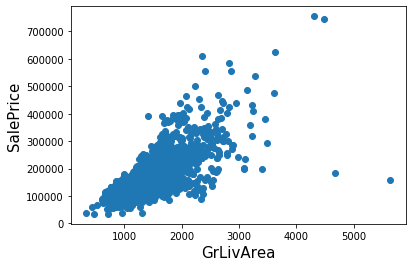

In [10]:
# 外れ値の確認
plt.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 15)
plt.xlabel("GrLivArea", fontsize = 15 )
plt.show()

In [11]:
# 外れ値除去
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

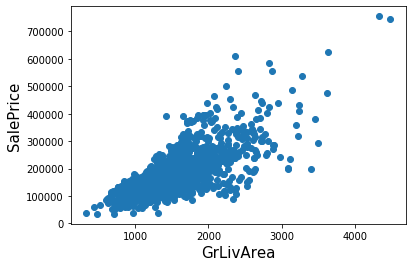

In [12]:
plt.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.ylabel("SalePrice", fontsize = 15)
plt.xlabel("GrLivArea", fontsize = 15 )
plt.show()

all_data.drop(['1stFlrSF','GarageArea','TotRmsAbvGrd', 'GarageYrBlt'], axis=1, inplace=True)   
  なぜdropしたかわからない

# 目的変数 # 結果　予測したい変数

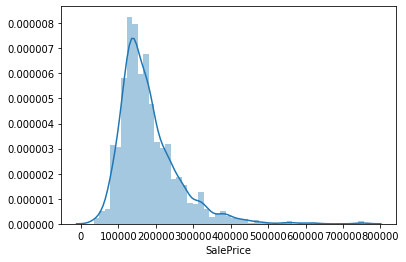

In [13]:
sns.distplot(train['SalePrice'])

# 目的変数のログ変換

In [14]:
# 目的変数を変換して正規分布にしてみる

In [15]:
train["SalePrice"] = np.log1p(train["SalePrice"])

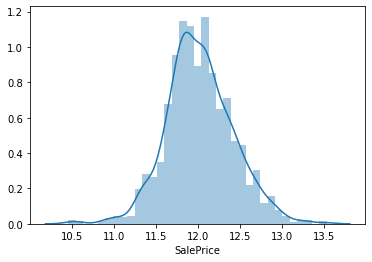

In [16]:
sns.distplot(train['SalePrice'] )

なぜlog変換するのか？ → 弾力性を一定とする

YのXに対する弾力性は，その定義により，
(dY/Y)/(dX/X)……(1)

一方，一般に対数関数logZ,(Z>0)の微分は，dlogZ/dZ=1/Z
これから，
dlogZ=dZ/Z
と書ける。

すると，弾力性の表現(1)は，
(dY/Y)/(dX/X)=dlogY/dlogX
と書ける。
この弾力性が，一定の値βだということは，
dlogY/dlogX=β
この関係は，Yの対数をXの対数に回帰した式
logY=α+βlogX
と整合的。

以上が，弾力性が一定の関係をデータから推定しようとするときに，それぞれの変数の対数をとった回帰式を用いることになる理由。
https://oshiete.goo.ne.jp/qa/2408749.html

この弾力性が，一定の値βだということは，dlogY/dlogX=β
この関係は，Yの対数をXの対数に回帰した式
logY=α+βlogX
と整合的

機械学習における正規分布の効果
予測しようとしている値が正規分布に従った方が精度が良くなる

数字のばらつき、偏りを小さくする

正規化「オーバーフィッティング（過学習）を防止するために値がゼロに近づくようにするテクニック

In [17]:
train.describe() # 基本統計量

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.251715,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,...,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187,12.024015
std,421.601532,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,...,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826,0.399713
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460271
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.774720
50%,730.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001512
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273736
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534474


In [18]:
train.info() # データの型の確認

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

# 各列（カラム）に欠損値があるか確認

In [19]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

# 各列に欠損値が幾つあるか確認

In [20]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [21]:
test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

# 欠損を含むcolumnのデータの型を確認

In [22]:
na_col_list = train.isnull().sum()[train.isnull().sum()>0].index.tolist() # 欠損を含むcolumuをリスト化
train[na_col_list].dtypes.sort_values() # データ型

LotFrontage     float64
MasVnrArea      float64
GarageYrBlt     float64
PoolQC           object
GarageCond       object
GarageQual       object
GarageFinish     object
GarageType       object
FireplaceQu      object
Electrical       object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Alley            object
Fence            object
MiscFeature      object
dtype: object

In [23]:
na_col_list = test.isnull().sum()[test.isnull().sum()>0].index.tolist() # 欠損を含むcolumuをリスト化
test[na_col_list].dtypes.sort_values() # データ型

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
SaleType         object
dtype: object

# データ型に応じて欠損値を補完

float64で欠損している場合は０,objectで欠損している場合はNanを代入

In [24]:
na_float_cols = train[na_col_list].dtypes[train[na_col_list].dtypes == "float64"].index.tolist()

In [25]:
na_obj_cols =train[na_col_list].dtypes[train[na_col_list].dtypes == "object"].index.tolist()

In [26]:
for na_float_col in na_float_cols:
    train.loc[train[na_float_col].isnull(),na_float_col] = 0.0

In [27]:
for na_obj_col in na_obj_cols:
    train.loc[train[na_obj_col].isnull(),na_obj_col] = "Nan"

# データの欠損状況

In [28]:
na_float_cols = test[na_col_list].dtypes[test[na_col_list].dtypes == "float64"].index.tolist()

In [29]:
na_obj_cols =test[na_col_list].dtypes[test[na_col_list].dtypes == "object"].index.tolist()

In [30]:
for na_float_col in na_float_cols:
    test.loc[test[na_float_col].isnull(),na_float_col] = 0.0

In [31]:
for na_obj_col in na_obj_cols:
   test.loc[test[na_obj_col].isnull(),na_obj_col] = "Nan"

In [32]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)
# trainの欠損値が補完されている

Electrical    1
dtype: int64

In [33]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)
# testの欠損値が補完されている

Series([], dtype: int64)

# 型の変換

astypeは、ndarrayの要素のデータ型を別のデータ型にしたndarrayを生成する。元のndarrayとは別のadarrayが生成っされるので、  
要素を変更しても元のndarrayには影響しない。

In [34]:
test['TotalBsmtSF'] = test['TotalBsmtSF'] .astype(np.int)
test['BsmtUnfSF'] = test['BsmtUnfSF'].astype(np.int)
test['BsmtFinSF2'] = test['BsmtFinSF2'].astype(np.int)
test['BsmtFinSF1'] = test['BsmtFinSF1'].astype(np.int)
train['GarageYrBlt'] =train['GarageYrBlt'].astype(np.int)#all_data["BsmtFullBath"] = all_data["BsmtFullBath"].astype(np.int)
test['GarageCars'] = test['GarageCars'].astype(np.int)
test['BsmtHalfBath'] =test['BsmtHalfBath'].astype(np.int)
test['GarageArea'] = test['GarageArea'].astype(np.int)#all_data["LotFrontage "] = all_data["LotFrontage"].astype(np.int)
train['MasVnrArea'] = train['MasVnrArea'].astype(np.int)
test['MasVnrArea'] = test['MasVnrArea'].astype(np.int)
train['LotFrontage'] = train['LotFrontage'].astype(np.int)
test['LotFrontage'] = test['LotFrontage'].astype(np.int)
test['BsmtHalfBath'] = test['BsmtHalfBath'].astype(np.int)
test['BsmtFullBath'] = test['BsmtFullBath'].astype(np.int)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
Id               1458 non-null int64
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1458 non-null int64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            1458 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-n

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null int64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-n

# Label Encoder を使う

In [37]:
# string label to categorical values
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))
        test.iloc[:,i] = lbl.transform(list(test.iloc[:,i].values))
# https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb

In [38]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,9,4,12.247699
1,2,20,4,80,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,9,4,12.109016
2,3,60,4,68,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,9,4,12.317171
3,4,70,4,60,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,9,0,11.849405
4,5,60,4,84,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,9,4,12.429220


In [39]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80,11622,1,1,3,3,0,...,120,0,3,2,1,0,6,2010,9,4
1,1462,20,4,81,14267,1,1,0,3,0,...,0,0,3,4,0,12500,6,2010,9,4
2,1463,60,4,74,13830,1,1,0,3,0,...,0,0,3,2,1,0,3,2010,9,4
3,1464,60,4,78,9978,1,1,0,3,0,...,0,0,3,4,1,0,6,2010,9,4
4,1465,120,4,43,5005,1,1,0,1,0,...,144,0,3,4,1,0,1,2010,9,4


# モデル作成

In [40]:
from sklearn.model_selection import train_test_split
X_train = train[:train.shape[0]]
X_test = test[train.shape[0]:]
#X_train.drop('Id', axis = 1, inplace = True)
#X_test.drop('Id', axis = 1, inplace = True)
y = train.SalePrice
test_ID = test['Id']


from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
model_lasso = Lasso()
scores = cross_val_score(model_lasso, X_train, y) # 交差検証で評価
scores.mean()

/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8211937827634962

In [41]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)
scores = cross_val_score(model_lasso, X_train, y) # 交差検証で評価
scores.mean()

/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3361603742949492, tolerance: 0.015370948099408706
  tol, rng, random, positive)
/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17156029177745627, tolerance: 0.015370948099408706
  tol, rng, random, positive)
/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not con

0.9999141831175514

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

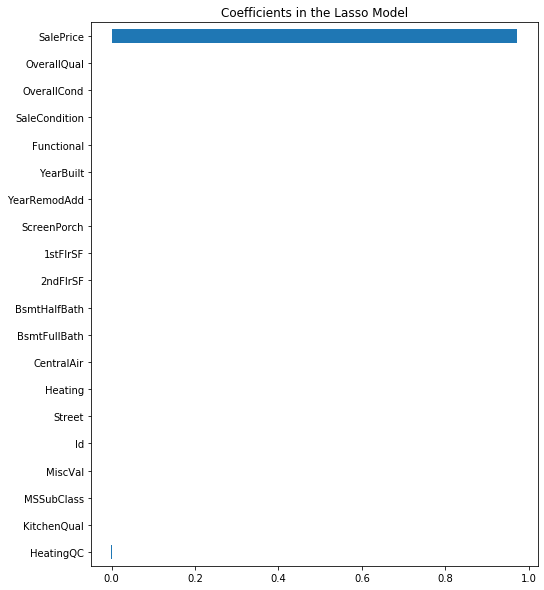

In [42]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
#print(“Lasso picked “ + str(sum(coef != 0)) + “ variables and eliminated the other “ + str(sum(coef == 0)) + “ variables”)
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)]) 
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

https://www.lancard.com/blog/2018/06/11/kaggle%E3%82%92%E8%A9%A6%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.3, random_state=1111)

In [44]:
# reg = Lasso(alpha=0.0004)
reg = Lasso()
reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
y_pred = reg.predict(X_test)

In [46]:
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(y_pred, y_test)))
# http://ochearno.net/entry/house_prices_top3percentile

ラッソ回帰でのRMSE: 0.1727435460152827


# SVR

In [47]:
from sklearn import preprocessing
sc=preprocessing.StandardScaler()
sc.fit(X_train,y)  # StandardScalerの学習
X=sc.transform(X_train)  # 学習結果をもとにX_trainのStandardScalerによる変換

In [48]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.transform(X_test)
#SVR
reg_svr = svm.SVR(C=1e6,epsilon=0.2,kernel='rbf')
reg_svr.fit(X_train_svr, y_train)
#RMSE
y_pred = reg_svr.predict(X_test_svr)
print("SVRでのRMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
# http://ochearno.net/entry/house_prices_stacking

SVRでのRMSE: 0.1144969523895327


/anaconda3/envs/tf111cpu/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [49]:
X_test2 = pd.DataFrame(reg_svr.predict(X_test))

In [50]:
y_pred = np.exp(reg.predict(X_test2))

ValueError: shapes (438,1) and (81,) not aligned: 1 (dim 1) != 81 (dim 0)

In [51]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice.csv', index=False)


ValueError: array length 438 does not match index length 1459

In [52]:
y_pred = np.exp(svr.predict(X_test_svr))

# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice.csv', index=False)


NameError: name 'svr' is not defined

In [53]:
# test_id
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#test_data = test_.drop('Id',axis=1)

#ls = Lasso(alpha = 0.01)
#pipeline = make_pipeline(scaler, ls)
#pipeline.fit(X_train,y)
#test_SalePrice = pd.DataFrame(np.exp(pipeline.predict(test_data)),columns=['SalePrice'])
#test_Id = pd.DataFrame(test_id,columns=['Id'])
#pd.concat([test_Id, test_SalePrice],axis=1).to_csv('../output/output.csv',index=False)
# https://yolo-kiyoshi.com/2018/12/17/post-1003/

# 決定木

目的：決定木とは木構造を用いて分類や回帰を行う機械学習の一つ。　　
分類木と回帰木の総称として決定木という。分類木は対象を分類する問題を解き、回帰木は対象の数値を推定する問題を解く。

# アルゴリズムの種類

1)CART  
目的変数といくつかの説明変数があるときに、まずは、目的変数を最もよく「分類」する、説明変数の分岐を生成する。これを、ルートノード（root node）  
という。  

2)C4.5(C5.0)  
CARTでは2つにしか分岐させられないが、C4.5では３つ以上にも分岐が可能。  
交差エントロピーと交差エントロピーから求める「Gain比」を利用して、ノードを分割する際に利用する特徴量を判断する。

ノンパラメトリックな教師あり学習の手法  
ノンパラメトリックとは母数（パラメータ）によらないことを意味する  
(パラメトリックとは母数（パラメータ)によることを意味する）

# 長所

1)結果をグラフィカルに提示できることから解釈が比較的容易であること

2)目的変数と説明変数の非線形構造および交互作用を有意義に捉えることができること

3)説明変数の再コード化等を検討する必要がない

# 短所

1)目的変数と説明変数によっては、パラメータをどうチューニングしても、望ましいレベルの木構造が得られない場合が多いこと

2)モデルとしてのロバスト性（頑健性）が弱く、適切でない説明変数が入ると、その変数にモデル全体が引っ張られてしまう

In [57]:
# 決定木
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y)
y_pred = tree.predict(X_train)
#tree_mse = mean_squared_error(y_pred,y)
print("DecisionTree RMSE:",np.sqrt(tree_mse))

ValueError: Number of labels=1458 does not match number of samples=1020

In [61]:
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
model = Sequential()
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(optimizer ='adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 500, batch_size = 3, verbose = 1)

Epoch 1/500
1020/1020 [==============================] - 2s 2ms/step - loss: 158969.1100
Epoch 2/500
1020/1020 [==============================] - 1s 897us/step - loss: 113020.8687
Epoch 3/500
1020/1020 [==============================] - 1s 877us/step - loss: 297288.2071
Epoch 4/500
1020/1020 [==============================] - 1s 887us/step - loss: 50551.8355
Epoch 5/500
1020/1020 [==============================] - 1s 880us/step - loss: 2794.6765
Epoch 6/500
1020/1020 [==============================] - 1s 894us/step - loss: 1208.8422
Epoch 7/500
1020/1020 [==============================] - 1s 899us/step - loss: 1279.6912
Epoch 8/500
1020/1020 [==============================] - 1s 897us/step - loss: 521.6862
Epoch 9/500
1020/1020 [==============================] - 1s 895us/step - loss: 329.0721
Epoch 10/500
1020/1020 [==============================] - 1s 897us/step - loss: 1554.5282
Epoch 11/500
1020/1020 [==============================] - 1s 938us/step - loss: 4627.0085
Epoch 12/500
102

1020/1020 [==============================] - 1s 863us/step - loss: 0.4332
Epoch 95/500
1020/1020 [==============================] - 1s 864us/step - loss: 2.2918
Epoch 96/500
1020/1020 [==============================] - 1s 861us/step - loss: 0.5149
Epoch 97/500
1020/1020 [==============================] - 1s 868us/step - loss: 0.3706
Epoch 98/500
1020/1020 [==============================] - 1s 851us/step - loss: 0.3517
Epoch 99/500
1020/1020 [==============================] - 1s 842us/step - loss: 0.3428
Epoch 100/500
1020/1020 [==============================] - 1s 863us/step - loss: 0.3250
Epoch 101/500
1020/1020 [==============================] - 1s 862us/step - loss: 0.3147
Epoch 102/500
1020/1020 [==============================] - 1s 851us/step - loss: 0.3199
Epoch 103/500
1020/1020 [==============================] - 1s 854us/step - loss: 0.2989
Epoch 104/500
1020/1020 [==============================] - 1s 860us/step - loss: 0.2862
Epoch 105/500
1020/1020 [==========================

1020/1020 [==============================] - 1s 913us/step - loss: 0.0403
Epoch 188/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0440
Epoch 189/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.1145
Epoch 190/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0362
Epoch 191/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0333
Epoch 192/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0336
Epoch 193/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0452
Epoch 194/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0524
Epoch 195/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0479
Epoch 196/500
1020/1020 [==============================] - 1s 945us/step - loss: 0.0409
Epoch 197/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0333
Epoch 198/500
1020/1020 [==============================] - 1s 1m

1020/1020 [==============================] - 1s 873us/step - loss: 0.0349
Epoch 281/500
1020/1020 [==============================] - 1s 883us/step - loss: 0.0418
Epoch 282/500
1020/1020 [==============================] - 1s 872us/step - loss: 0.0387
Epoch 283/500
1020/1020 [==============================] - 1s 870us/step - loss: 0.0382
Epoch 284/500
1020/1020 [==============================] - 1s 877us/step - loss: 0.0350
Epoch 285/500
1020/1020 [==============================] - 1s 878us/step - loss: 0.0350
Epoch 286/500
1020/1020 [==============================] - 1s 892us/step - loss: 0.0289
Epoch 287/500
1020/1020 [==============================] - 1s 877us/step - loss: 0.0383
Epoch 288/500
1020/1020 [==============================] - 1s 874us/step - loss: 0.0356
Epoch 289/500
1020/1020 [==============================] - 1s 878us/step - loss: 0.0363
Epoch 290/500
1020/1020 [==============================] - 1s 863us/step - loss: 1.3047
Epoch 291/500
1020/1020 [=====================

1020/1020 [==============================] - 1s 881us/step - loss: 0.0379
Epoch 374/500
1020/1020 [==============================] - 1s 866us/step - loss: 0.0424
Epoch 375/500
1020/1020 [==============================] - 1s 908us/step - loss: 0.0354
Epoch 376/500
1020/1020 [==============================] - 1s 878us/step - loss: 0.0378
Epoch 377/500
1020/1020 [==============================] - 1s 896us/step - loss: 0.3604
Epoch 378/500
1020/1020 [==============================] - 1s 887us/step - loss: 0.0578
Epoch 379/500
1020/1020 [==============================] - 1s 960us/step - loss: 0.0541
Epoch 380/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0586
Epoch 381/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0589
Epoch 382/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.0455
Epoch 383/500
1020/1020 [==============================] - 1s 987us/step - loss: 0.0503
Epoch 384/500
1020/1020 [===========================

1020/1020 [==============================] - 1s 865us/step - loss: 0.1622
Epoch 467/500
1020/1020 [==============================] - 1s 862us/step - loss: 0.1616
Epoch 468/500
1020/1020 [==============================] - 1s 872us/step - loss: 0.1607
Epoch 469/500
1020/1020 [==============================] - 1s 875us/step - loss: 0.1624
Epoch 470/500
1020/1020 [==============================] - 1s 894us/step - loss: 0.1609
Epoch 471/500
1020/1020 [==============================] - 1s 966us/step - loss: 0.1613
Epoch 472/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.1628
Epoch 473/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.1630
Epoch 474/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.1612
Epoch 475/500
1020/1020 [==============================] - 1s 1ms/step - loss: 0.1623
Epoch 476/500
1020/1020 [==============================] - 1s 972us/step - loss: 0.1619
Epoch 477/500
1020/1020 [=============================

In [62]:
predictions = model.predict( test[COLUMNS].values)
 
origin_test["SalePrice"] = np.round(predictions).astype(np.int)
 
# 出力する
origin_test[["Id","SalePrice"]].to_csv("./data/house-prices-advanced-regression-techniques/out.csv",index=False)

NameError: name 'COLUMNS' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)
# define the grid search parameters
optimizer = ['SGD','Adam']
batch_size = [10, 30, 50]
epochs = [10, 50, 100]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)
reg_dl = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
reg_dl.fit(X_train, y_train)
#RMSE
y_pred =np.exp(reg.predict(X_test))
# print("KerasでのRMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
# https://qiita.com/katsu1110/items/a1c3185fec39e5629bcb

In [ ]:
# submission
submission = pd.DataFrame({
    "Id": test_ID,
    "SalePrice": y_pred
})
submission.to_csv('houseprice2.csv', index=False)